# PRACTICA GUIADA: Nociones de Estadística Inferencial

## Introducción

La idea de esta práctica es 
Observemos la distribución de los [Klout Scores](https://klout.com/corp/score) que se adjunta en el archivo `klouts_scores.csv`.

Imagine que tomamos como población las 1048 observaciones de Klout scores con las que contamos. 


## 1. Aproximando una distribución muestral de medias

### Consignas

1. Obtenemos una muestra de tamaño 5 y tomamos el promedio. Repetimos este paso 1000 veces para poder hacer un histograma de las medias. 
2. Obtenemos una muestra de tamaño  10 y tomamos el promedio. Repetimos este paso 1000 veces.
3. Obtenemos una muestra de tamaño 100 y tomamos el promedio. Repetimos este paso 1000 veces.
4. ¿Qué observa sobre el histograma de la media a medida que vamos aumentando el tamaño muestral?
5. ¿Qué observa acerca del valor de las medias de las diferentes distribuciones muestrales en relación a la media poblacional?
6. ¿Qué sucede con el desvío estándar? 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('klout_scores.csv', header=None, decimal=",")
df.columns = ['k_score']

Definimos una función para hacer el sampling y calcular la media para una muestra de tamamaño n.

In [3]:
def sampling(df, n, r = False):
    index = np.random.choice(range(0,len(df)), size = n, replace = r)
    df_s = np.array(df.iloc[index,])
    
    return(df_s)

def samp_mean(df, n_i):
    means = []
    for reps in range(0,1000):
        s_ = sampling(df, n_i, r = True)
        m_ = s_.mean()
        means.append(m_)
    return(means)


In [4]:
# Exploramos el DataFrame:

df.head()

,k_score
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


In [5]:
# Obtenemos las principales medidas descriptivas:

df.describe()

,k_score
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


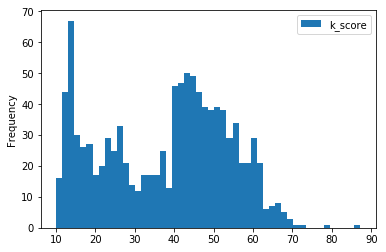

In [7]:
# Visualizamos la distribución de los scores Klout. Vemos que su distribución es bimodal 
df.plot.hist(bins=50);

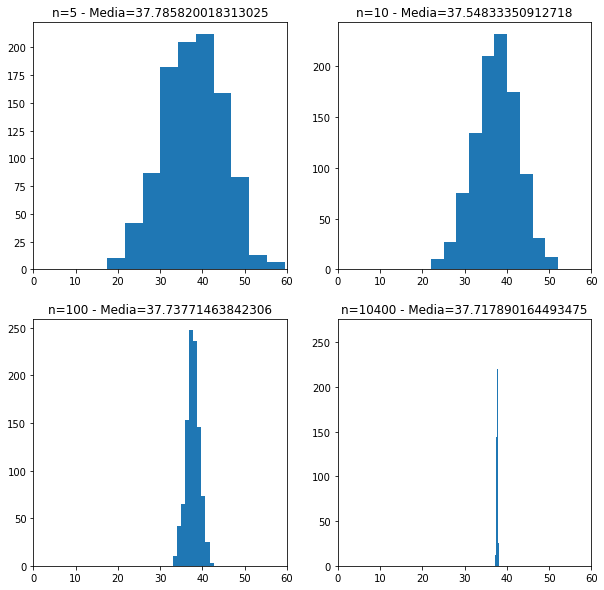

In [8]:
m = []
n_s = [5,10,100,10400]
plt.figure(figsize=(10,10))
for i in range(len(n_s)):
    
    mm = samp_mean(df, n_s[i])    
    
    plt.subplot(('22' + str(i+1)))
    
    plt.hist(mm)
    
    plt.xlim((0,60))
    
    plt.title('n=' + str(n_s[i]) + ' - ' + 'Media=' + str(np.mean(mm)))
    

## 2. Calculando un intervalo de confianza con `scipy`

### Consignas

1. Ahora, extraiga una muestra de la población de tamaño n=200. 
2. A continuación, calcule un intervalo de confianza del 95% para la media poblacional

In [9]:
#Extraemos la muestra 
sample = sampling(df,200)

In [10]:
sample

array([[13.58380148],
       [56.51598016],
       [12.13981508],
       [23.22223768],
       [60.99318829],
       [54.91981112],
       [48.40714053],
       [13.24425152],
       [21.76329323],
       [44.48242985],
       [23.16390037],
       [15.97422662],
       [30.32072007],
       [50.49586619],
       [50.07522653],
       [45.41536496],
       [42.75293165],
       [13.89571237],
       [13.34426333],
       [64.69624   ],
       [55.57813383],
       [13.23209985],
       [13.92698038],
       [57.09565426],
       [28.27028223],
       [22.62969025],
       [34.9734798 ],
       [47.7943819 ],
       [43.75262131],
       [35.23589683],
       [13.40468287],
       [51.59388224],
       [27.9806438 ],
       [50.51128268],
       [40.2062056 ],
       [37.23001476],
       [55.32780302],
       [13.16056477],
       [37.92123349],
       [62.37865279],
       [13.13950746],
       [21.07289964],
       [40.89873483],
       [25.08567078],
       [30.35920639],
       [56

In [11]:
# Calculamos los estadísticos para utilizar
mean, sigma, n = np.mean(sample), np.std(sample), len(sample)

# Calculamos el intervalo de confianza de una aproximación normal con el método de scipy
st.norm.interval(0.95, loc=mean, scale = sigma/np.sqrt(n) )

(35.64537966518106, 40.22693758047894)

In [12]:
# Podemos calcularlo a mano... en base a la fórmula vista en las slides

mean - 1.96 * sigma/np.sqrt(n), mean + 1.96*sigma/np.sqrt(n)

(35.64533757080665, 40.22697967485335)

In [ ]:
# Podemos usar la T-Student:

st.t.interval(0.95, n-1,  loc=mean, scale=sigma/(np.sqrt(n)))

In [ ]:
# Podemos calcularlo a mano:

EI = mean + st.t.ppf(0.025, n-1)* sigma/(np.sqrt(n))
ES = mean + st.t.ppf(0.975, n-1)* sigma/(np.sqrt(n))

IC = (EI, ES)
IC

In [ ]:
# ppf(q, df, loc=0, scale=1)	Percent point function. Inversa de la cdf (cumulative density function) 

st.t.cdf(st.t.ppf(0.025, n-1), n-1)

In [ ]:
st.t.cdf(st.t.ppf(0.975, n-1), n-1)